# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v5i2-norm175366

1. 五個變數

2. 認定條件是老師給的：sentiment排在第二個

3. 用normal seed 175366

### 環境設定

In [1]:
# 設定路徑
Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
#inv_tol = 1e-22

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: matrixcalc

Loading required package: lattice

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘pack

In [2]:
options(warn=-1)    # 關掉warning
options(scipen=999) #不要科學記號

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 5-variable model
By <- data %>% select(interest_rate, Sentiment, permit, loan, hp) %>% as.matrix
# 按照老師建議的將情緒指標擺在第二個的identification

### 模型設定

In [4]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [5]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.739412234,12.8661883,0.0000263549677,0.0000016481157,0.00157780999,0.2058125800,-1.37766337,0.0000027925483,-0.00000150670791,0.00037227209,-0.98135713
-0.001820585,0.5882432,-0.0000002106869,0.0000000218669,0.00004166464,0.0005469696,-0.01251142,0.0000002605605,-0.00000002506293,-0.00009221357,0.02477925
595.720535604,-3839.2386321,0.4902992893261,-0.0013168897154,105.96315170808,-691.0368022795,-22121.45801205,0.3508181528935,-0.00045077668059,-128.43304856589,8733.03170956
898.569179676,687550.4448438,-5.2365916608996,1.5403310012006,-903.07624719618,2333.0291613024,1081851.30565977,4.1560900739505,-0.57090240932855,575.99146027677,73629.51323116
-0.720966521,94.7258456,0.0000136431611,-0.0000028804660,1.25940976757,-0.1241455873,-139.67383993,0.0002538225927,0.00000349788944,-0.26380971388,1.54658981


0.2094021908,0.00032624980,43.1662450,1714.87479,-0.02924678
0.0003262498,0.00002654587,0.3561961,6.18933,0.00860039
43.1662450355,0.35619611958,1072159.6958630,3025331.39276,1115.41428751
1714.8747937261,6.18932969308,3025331.3927646,615915845.86923,35.46975261
-0.0292467778,0.00860039049,1115.4142875,35.46975,12.95967973


0.1897148053,0.00029557674,39.1078801,1553.647249,-0.026497081
0.0002955767,0.00002405011,0.3227076,5.607427,0.007791807
39.1078801177,0.32270759552,971358.3569357,2740898.526778,1010.546277578
1553.6472490168,5.60742690143,2740898.5267782,558009227.881521,32.134989540
-0.0264970807,0.00779180677,1010.5462776,32.134990,11.741248298


### AIC/SIC

In [6]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 23.66979

AIC,25.54529,24.60996,24.73958,24.67272
SIC,26.24971,25.90842,26.63861,27.17897
HQ,25.83131,25.13712,25.51048,25.69000


AIC SIC  HQ 
  2   2   2

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &a_{32} &a_{33} &0 &0\\
a_{41} &a_{42} &0 &a_{44} &a_{45}\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
    e_t^{expectation}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

In [7]:
### 5-variable model
# 如果不是Wold遞迴式 -> 自定義
Amat = diag(5)
Amat[2,1]  = NA;
Amat[3,1]  = NA; Amat[3,2]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,5]  = NA;
Amat[5,1]  = NA; Amat[5,2]  = NA; Amat[5,3]  = NA; Amat[5,4]  = NA;

Bmat = diag(5)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0,0
NA,1,0,0,0
NA,NA,1,0,0
NA,NA,0,1,NA
NA,NA,NA,NA,1


NA,0,0,0,0
0,NA,0,0,0
0,0,NA,0,0
0,0,0,NA,0
0,0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

### 1. 找起始值

為了得到合理的估計，在設定完認定條件後，依以下步驟蒐集seeds:

1. 給定一個seed，估 $\hat{A} , \hat{B}$ ，從normal或uniform隨機assign起始值

2. 如果 $se(\hat{A}), se(\hat{B})$ 存在，進入下一步，若否則回到第一步

3. 如果標準誤都小於2500，則存下這個seed

4. 直到存的seed總數大於100則迴圈終止

```R
### Brutal Force
seed_stored <- c()
i <- 162150
while(TRUE){
  set.seed(i)
  SVAR_AB_est <- try(VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal"), 
                     silent = TRUE)
  A0.Std <- try(SVAR_AB_est$A0.Std)
  B0.Std <- try(SVAR_AB_est$B0.Std)
  if(sum(is.na(A0.Std))==0 && sum(is.na(B0.Std))==0){
    if(max(A0.Std)<=2500 && max(B0.Std)<=2500){
      seed_stored <- rbind(seed_stored, i)
      cat("Seed: ", i, " found\n")
      write.csv(seed_stored, "seed_v5_identification2_Std2500.csv")
    }
  }
  i <- i+1
  if(length(seed_stored)>=3000){
    break
  }
  cat("Now in teration: ", i, "\n",
      "There are ", length(seed_stored), " seeds found", "\n")
}
```

### 2. 比標準誤大小

以下的程式可以從上面存下的seeds中計算出每個seed對應的 $\hat{A}, \hat{B}$ 的標準誤大小

```R
# 上面找到的seeds
seeds <- read_csv("seeds/v5_identification2/seed_AB_std_smaller1500_identification_sent2th_runif.csv")$V1

# 製作表
df_seeds <- matrix(NA, nrow = length(seeds), ncol = 3)
counter <- 1
for(seed in seeds){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
  A0 <- SVAR_AB_est$A0.svar
  B0 <- SVAR_AB_est$B0.svar
  A0.Std <- SVAR_AB_est$A0.Std
  B0.Std <- SVAR_AB_est$B0.Std
  df_seeds[counter,1] <- seed
  df_seeds[counter,2] <- max(A0.Std)
  df_seeds[counter,3] <- max(B0.Std)
  counter <- counter+1
}
df_seeds <- as.data.frame(df_seeds)
colnames(df_seeds) <- c("seed", "A0.Std.Max", "B0.Std.Max")

print(df_seeds %>% arrange(A0.Std.Max))
```

### 3. 從變異數分解看Possible Seed

但標準誤小不見得就可以有好的估計的結果

下面的程式可以從已存下的seeds一個個輸出變異數分解的結果至一個純文字檔中

```R
# 看變異數分解
for(seed in seed_stored){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
  SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
  SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                         AMat, BMat, h=119,
                                         Const=TRUE, ddTheta = SVAR_AB_IRF)
  cat("Now in seed: ", file = "output.txt",append = T);
  cat(seed, file = "output.txt", append = T)
  cat("\n\n", file = "output.txt", append = T)
  cat(SVAR_AB_VarDecomp*100, file = "output.txt", append = T)
  cat("\n\n", file = "output.txt", append = T)
}
```

# 找到的seed

從normal(0,1)抽出的好的seed:

175366, 181559

In [8]:
set.seed(175366)
rnorm(15)

[1] -0.35629783 -0.11185045 -0.13178357 -1.62338903 -0.42328429 -1.25262497
 [7]  0.83932669 -0.41178510 -1.78538561 -0.44987514  0.09213794  1.13200678
[13]  1.18020953 -0.61435168 -1.03669643

In [9]:
set.seed(181559)
rnorm(15)

[1] -0.3752681  1.1966139 -0.8494014 -0.1049917 -1.4367628 -0.7364365
 [7]  0.4783460  0.6192159  0.4689445 -0.7537429 -0.1743853  0.1232136
[13] -0.2509900 -0.5982678  0.9983071

In [10]:
set.seed(175366)
SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
A0 <- SVAR_AB_est$A0.svar
B0 <- SVAR_AB_est$B0.svar
A0.Std <- SVAR_AB_est$A0.Std
B0.Std <- SVAR_AB_est$B0.Std

## A, B Matrix

In [11]:
A0; B0
A0.Std; B0.Std

1.00000000,0.0000000,0.0000,0.00000,0.00
-0.00154024,1.0000000,0.0000,0.00000,0.00
-34.61676090,-0.6393976,1.0000,0.00000,0.00
-0.54601238,-0.3567128,0.0000,1.00000,-20001.98
-0.58211863,-0.3596523,-303.3699,30.62731,1.00


0.4577875,0.000000000,0.000,0.0,0.0
0.0000000,0.005202272,0.000,0.0,0.0
0.0000000,0.000000000,851.631,0.0,0.0
0.0000000,0.000000000,0.000,117928.1,0.0
0.0000000,0.000000000,0.000,0.0,741813.5


0.000000000,0.000,0.00000,0.000000,0.000
0.001051019,0.000,0.00000,0.000000,0.000
173.331084780,1464.004,0.00000,0.000000,0.000
2376.396033639,1959.919,0.00000,0.000000,1580.262
818.963357589,2194.983,66.48342,1.985746,0.000


0.02994378,0.0000000000,0.00000,0.000,0.000
0.00000000,0.0002928963,0.00000,0.000,0.000
0.00000000,0.0000000000,42.76779,0.000,0.000
0.00000000,0.0000000000,0.00000,1588.088,0.000
0.00000000,0.0000000000,0.00000,0.000,1463.322


## IRF (without Bootstrap C.I.)

In [12]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 25) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:5){
    for(i in 1:5){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [13]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))
p17 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V17))
p18 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V18))
p19 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V19))
p20 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V20))
p21 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V21))
p22 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V22))
p23 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V23))
p24 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V24))
p25 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V25))

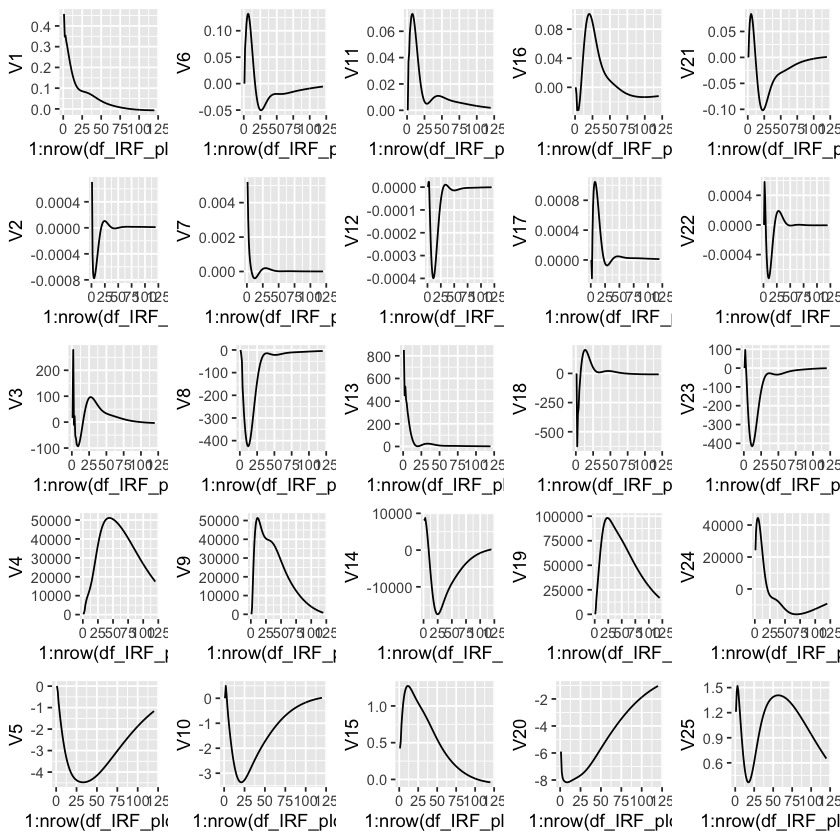

In [14]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

```R
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)
```

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)
# obs:119 lag:2 -> 117
# Y: 5 vairables
# X: 5個變數的t-1, t-2 -> 10 variables
dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 55 coef.
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU

#BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}
dm.U <- U-mean(U)
#dm.U = scale(U, scale = FALSE)                       # Step 2 減去殘差的平均數
N = 1000 #重抽次數
dim(ddX); dim(Coef.noc); dim(dm.U)
#Y.sim <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + dm.U

# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,25,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){
  rm(Y.sim); rm(SVAR_AB_est.sim)
  cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ]
  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]
  
  Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###
  SVAR_AB_est.sim <- try(VAR.svarest.AB(Y.sim, VAR.P, Amat, Bmat, CONST, start = "normal"), silent = T)
  if(class(SVAR_AB_est.sim)=="try-error"){
    print(Y.sim[length(Y.sim)])
    print(U.sim[length(U.sim)])
    print("Bad Trial")
    next
  }
  A0.Std.sim <- try(SVAR_AB_est.sim$A0.Std, silent = T)
  B0.Std.sim <- try(SVAR_AB_est.sim$B0.Std, silent = T)
  cat(class(A0.Std.sim), "\t", class(B0.Std.sim), "\n")
  
  if(class(A0.Std.sim)=="try-error" | class(B0.Std.sim)=="try-error" ){
    cat("This iteration turns out a bad result. Try next.\n")
    next
  }
  
  if(sum(is.na(A0.Std.sim))==0 && sum(is.na(B0.Std.sim))==0){
    #IRF
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    cat("This iteration turns out a proper result. \n
        Estimate its IRF and save.\n")
  }else{
    next
  }
  # SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est.sim)
  # cat("This iteration turns out a proper result. \n
  #     Estimate its IRF and save.\n")
  
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, 25) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:5){
      for(i in 1:5){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
```

```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v5i2-norm175366.rds")
```

In [15]:
df_IRF.sim <- read_rds("/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/v5_identification2/df_IRF.sim_v5i2-norm175366.rds")

In [16]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.4577875,0.0007051025,15.847570,156.9819,0.007835808,0.00000000,0.00520227250,0.003326321,0.03300893,0.000001557506,⋯,-0.00000000000005343703,-0.00000000000000008230584,-0.000000000001849869,0.1925017,-5.895810,0.000000000,0.00000000000,0.0000,24220.62,1.2109107
0.1976106,0.0000457901,43.089353,5103.0408,0.077155965,0.03579841,0.00069336003,258.985773227,11621.40545200,-0.213015638625,⋯,0.03962122490962773080,-0.00054006353030996230753,-92.303237694060811691,4321.0797869,-4.650431,0.017641927,-0.00008251119,-118.3701,20765.77,0.5840443
0.3340766,-0.0005353385,1.322895,7640.7320,-0.533468121,0.11147878,0.00134510450,92.459396652,14910.78647000,-0.219518610849,⋯,-0.02446887619174074185,0.00062778612121228345201,37.539171342123495378,5158.0033097,-4.900230,-0.000787244,-0.00023993647,-129.3176,20373.94,0.6313437
0.2418244,-0.0004711234,-49.602752,9542.6407,-0.638115802,0.07325499,0.00033318828,147.250019207,18971.72785379,-0.457032857370,⋯,0.01404515626862167833,0.00019196449079505740727,111.404930351961951374,7775.5666374,-4.725262,0.004934395,-0.00025006929,-160.5918,18800.87,0.5612596
0.2611021,-0.0007257530,-63.665464,10790.0924,-1.024673042,0.12252846,0.00010877262,70.077327714,20368.86547448,-0.561181937764,⋯,-0.00067852867328141789,0.00063988415435643601365,160.009752144119261175,10018.1613560,-4.601222,-0.007552311,-0.00026227759,-176.4863,17388.80,0.5393239
0.2244250,-0.0006480184,-99.461548,11569.4042,-1.188318229,0.09346018,-0.00005725592,47.589818097,21426.22394935,-0.674728264081,⋯,0.01421879903661458361,0.00049573587489452181597,223.387967513661209296,12861.4667069,-4.534900,-0.010031251,-0.00026318419,-189.8876,15881.69,0.5055889


### 畫IRF & Bootstrap C.I.

In [17]:
df_IRF_plot.BS.L <- matrix(NA, 120, 25)
df_IRF_plot.BS.U <- matrix(NA, 120, 25)
df_IRF_plot.BS.Median <- matrix(NA, 120, 25)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 25)
for(col in 1:25){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

```R
##### Plot #####

shock1y1 <- bind_cols(df_IRF_plot.BS.L$V1, df_IRF_plot.BS.U$V1,
                      df_IRF_plot.BS.Median$V1, df_IRF_plot.BS.Mean$V1, 
                      df_IRF_plot$V1)
colnames(shock1y1) <- c("Lower", "Upper", "Median", "Mean", "IRF")
ggplot(shock1y1) + 
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Median), col = "Blue")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Mean), col = "Red")
ggplot(shock1y1) +
  geom_line(aes(x = 1:nrow(shock1y1), y = IRF), col = "Red")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")

```

In [18]:
ind <- 0
for(i in 1:5){
  for(j in 1:5){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") + geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Mean), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4

New names:
* V12 -> V12...1
* V12 -> V12...2
* V12 -> V12...3
* V12 -> V12...4

New names:
* V13 -> V13...1
* V13 -> V13...2
* V13 -> V13...3
* V13 -> V13...4

New names:
* V14 -> V14...1
* V1

In [19]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1: mp
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Monetary Policy Shock')+Text_Size_Theme
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2: price expectation
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Price Expectation Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Price Expectation Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Price Expectation Shock')+Text_Size_Theme
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Price Expectation Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Price Expectation Shock')+Text_Size_Theme

## shock3: supply shock
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Supply Shock')+Text_Size_Theme
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Supply Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme


## shock4: demand shock
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p17 <- p17+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Demand Shock')+Text_Size_Theme
p18 <- p18+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p19 <- p19+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Demand Shock')+Text_Size_Theme
p20 <- p20+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock5: sp
p21 <- p21+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p22 <- p22+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Speculation Shock')+Text_Size_Theme
p23 <- p23+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p24 <- p24+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Speculation Shock')+Text_Size_Theme
p25 <- p25+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

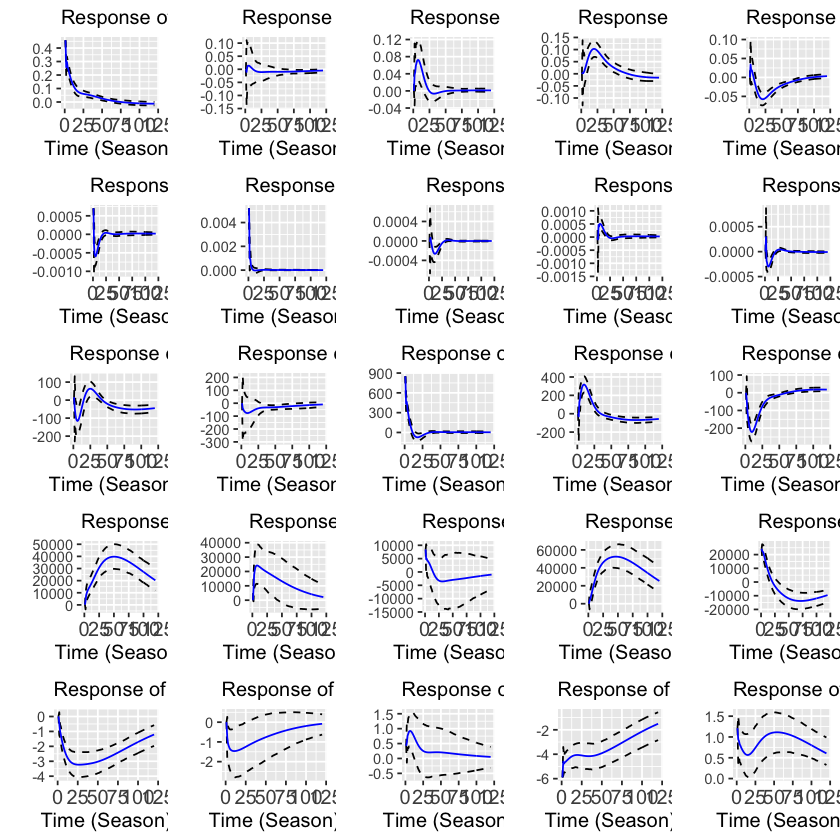

In [20]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

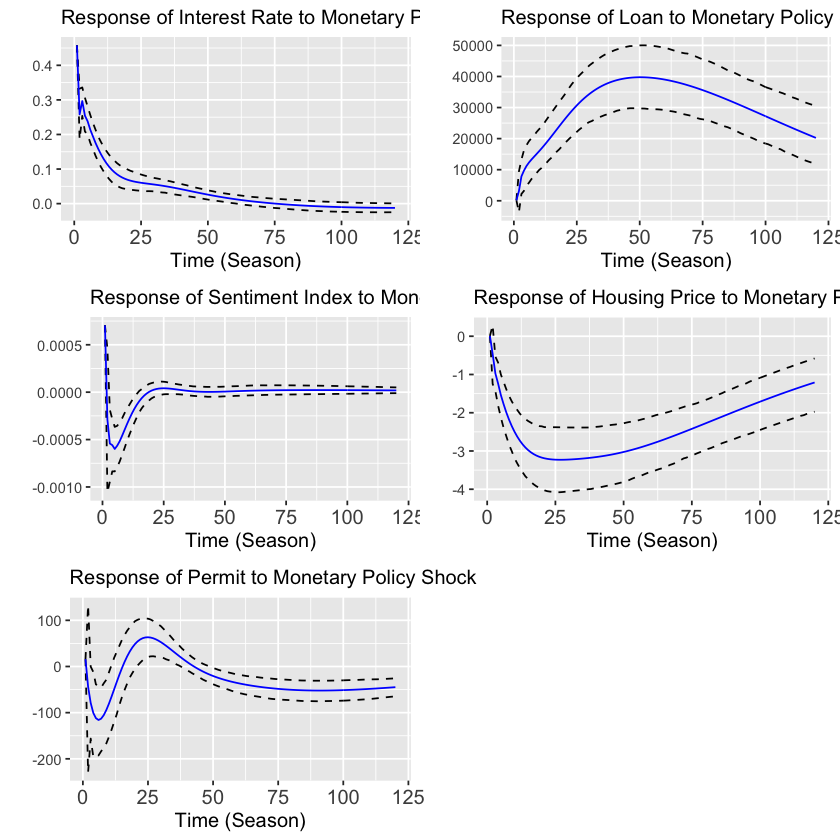

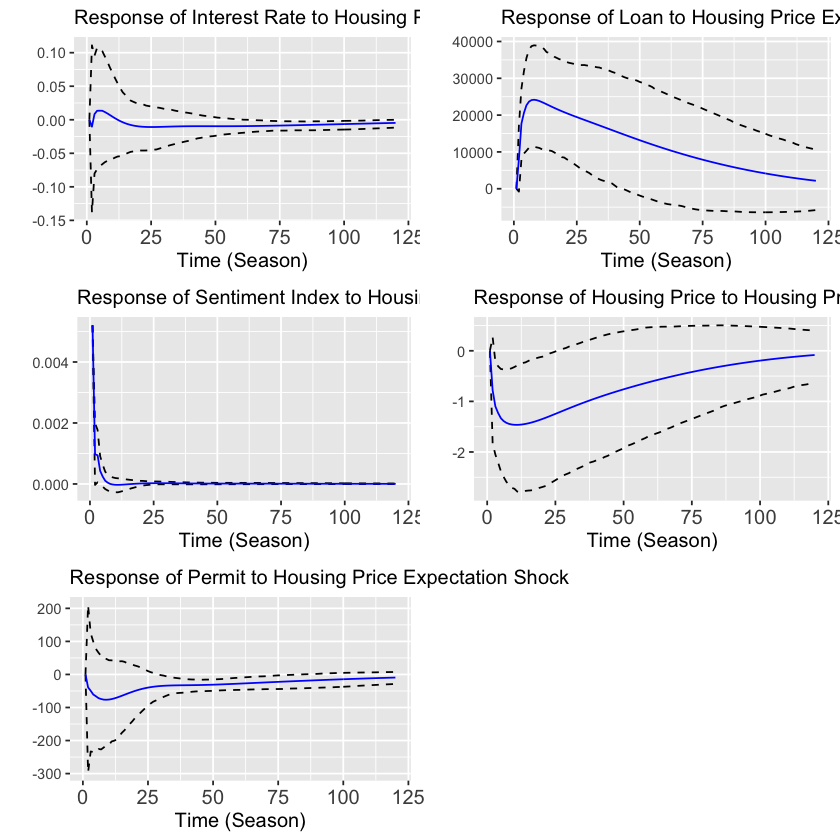

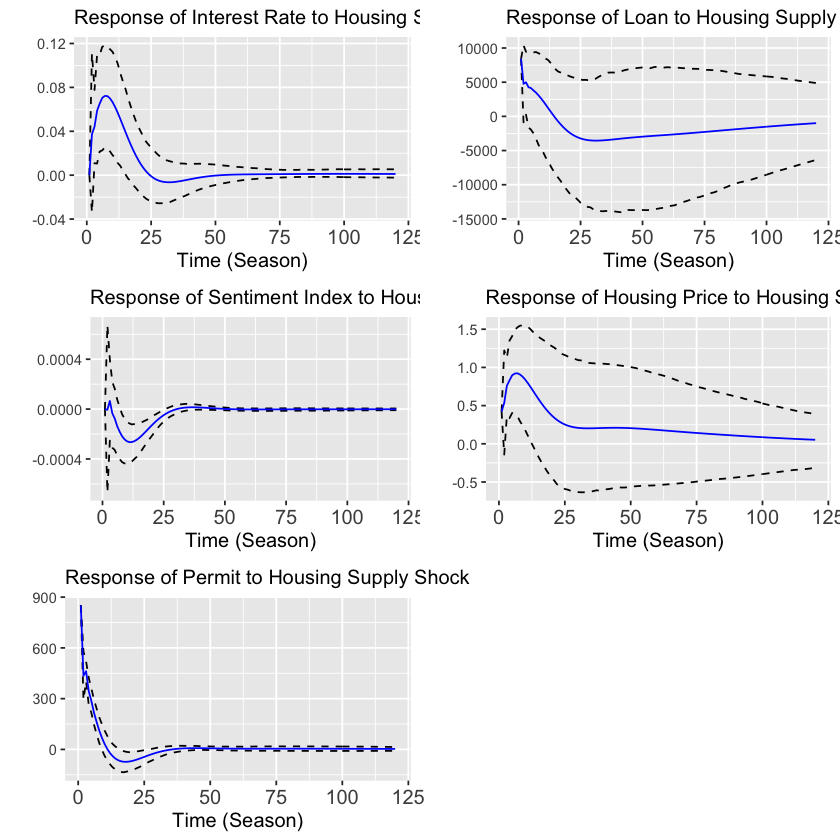

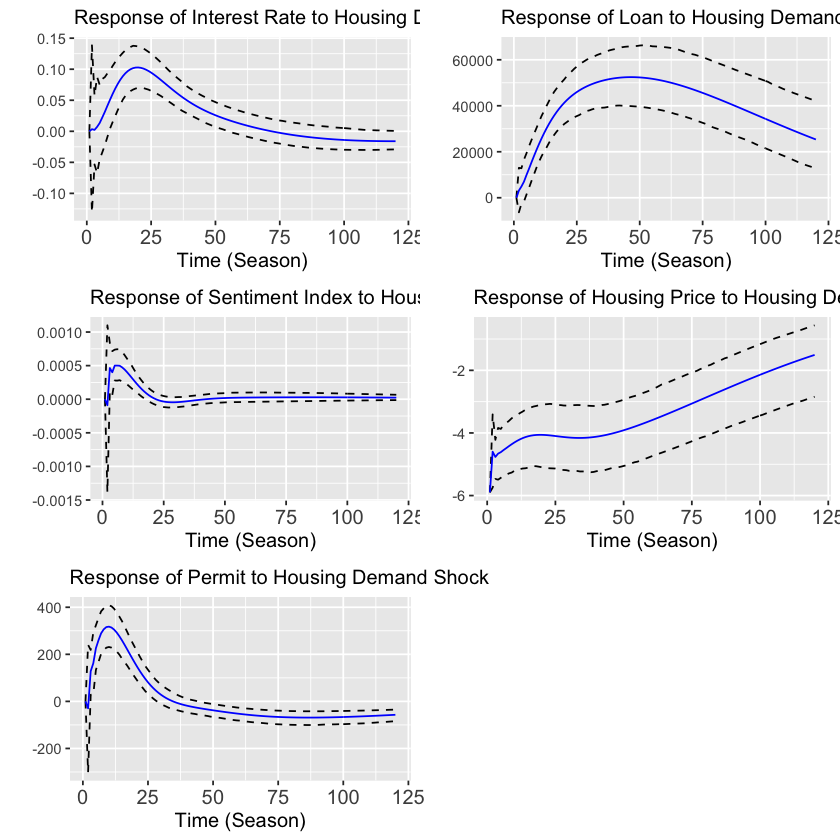

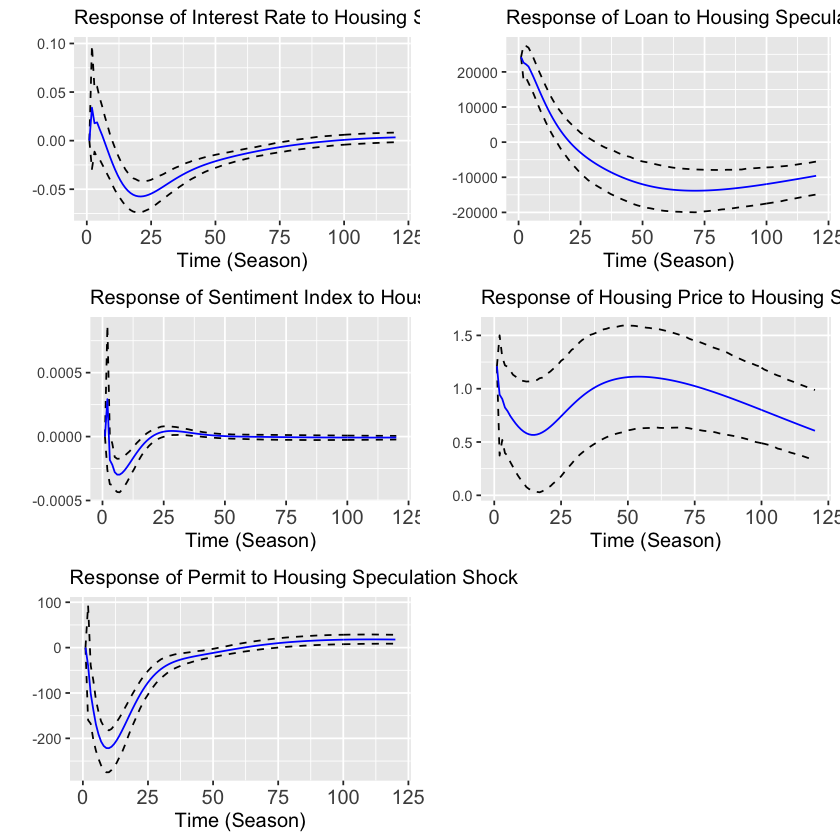

In [21]:
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)

In [22]:
# save plot
# shock 1
ggsave(filename = "figure/SVAR_v5i2-norm175366_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4,p5, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 2
ggsave(filename = "figure/SVAR_v5i2-norm175366_IRF_shock2.png", 
       plot = multiplot(p6,p7,p8,p9,p10, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "figure/SVAR_v5i2-norm175366_IRF_shock3.png", 
       plot = multiplot(p11,p12,p13,p14,p15, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "figure/SVAR_v5i2-norm175366_IRF_shock4.png", 
       plot = multiplot(p16,p17,p18,p19,p20, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 5
ggsave(filename = "figure/SVAR_v5i2-norm175366_IRF_shock5.png", 
       plot = multiplot(p21,p22,p23,p24,p25, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [23]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
tail(SVAR_AB_VarDecomp*100)

h=115,24.03010,6.865281,0.9617540,65.44592,2.696946
h=116,24.04556,6.860618,0.9611211,65.42804,2.704660
h=117,24.06030,6.856202,0.9605252,65.41089,2.712088
h=118,24.07435,6.852022,0.9599646,65.39443,2.719238
h=119,24.08773,6.848070,0.9594377,65.37865,2.726117
h=120,24.10047,6.844335,0.9589427,65.36352,2.732734


In [24]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           expectation = V2,
           hs = V3,
           hd = V4,
           sp = V5) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           expectation = round(expectation, digits = 2),
           hs = round(hs, digits = 2),
           hd = round(hd, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,expectation,hs,hd,sp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.00,0.49,95.48,4.03
2,0.07,0.26,0.47,95.40,3.80
4,0.84,0.16,0.79,94.67,3.53
8,3.31,1.30,1.31,91.50,2.57
12,6.12,3.28,1.55,87.23,1.81
20,10.86,6.82,1.58,79.67,1.07
40,17.32,8.62,1.32,71.70,1.04
60,20.84,7.88,1.13,68.51,1.65
80,22.75,7.28,1.03,66.75,2.19


In [25]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Sun Jan 24 12:15:59 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
period & mp & expectation & hs & hd & sp \\ 
  \hline
1.00 & 0.00 & 0.00 & 0.49 & 95.48 & 4.03 \\ 
  2.00 & 0.07 & 0.26 & 0.47 & 95.40 & 3.80 \\ 
  4.00 & 0.84 & 0.16 & 0.79 & 94.67 & 3.53 \\ 
  8.00 & 3.31 & 1.30 & 1.31 & 91.50 & 2.57 \\ 
  12.00 & 6.12 & 3.28 & 1.55 & 87.23 & 1.81 \\ 
  20.00 & 10.86 & 6.82 & 1.58 & 79.67 & 1.07 \\ 
  40.00 & 17.32 & 8.62 & 1.32 & 71.70 & 1.04 \\ 
  60.00 & 20.84 & 7.88 & 1.13 & 68.51 & 1.65 \\ 
  80.00 & 22.75 & 7.28 & 1.03 & 66.75 & 2.19 \\ 
  120.00 & 24.10 & 6.84 & 0.96 & 65.36 & 2.73 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [31]:
print(tab_VD, file="table/SVAR_v5i2-norm175366_VD.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [32]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  25

In [33]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,0.005097271,10465.00,1051038,98.1600
2,8.270000,0.015780528,17129.00,1073968,104.1600
,7.675291,0.014417542,17136.35,1084673,104.2331
,7.431884,0.016005012,17351.92,1131749,103.1554
,7.217294,0.017739689,17559.81,1196077,102.2756
,7.068041,0.019299676,17675.20,1270418,101.6163


[1] 119   5

[1] 119   5

In [34]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,Sentiment,permit,loan,hp
1,0.00000000,0.000000000,0.0000,0.00,0.000000
2,0.00000000,0.000000000,0.0000,0.00,0.000000
3,0.09137594,0.001708533,195.6465,26935.89,2.446907
4,-1.40921685,0.002446206,2822.0828,41512.46,6.834601
5,-0.84396048,-0.004591036,1730.1946,34623.49,10.934421
6,0.65062518,-0.001928391,7036.8030,67892.13,16.203727


In [35]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,6,11,16,21)])

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
0.09137594,0.0001407409,3.163229,31.33413,0.001564054
-1.48266136,-0.0024742042,1.836812,-323.10092,-0.077192601
-1.07450668,0.0013362414,-944.734729,-3097.17501,0.708425211
0.45186570,0.0045405374,114.698533,-5963.49405,2.365528139


In [36]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,5], 
      (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])

1,0.000000,NA
2,0.000000,NA
3,2.446907,0.001564054
4,6.834601,-0.077192601
5,10.934421,0.708425211
6,16.203727,2.365528139
7,18.147015,2.601151291
8,18.238022,2.317026466
9,18.590100,3.149516117
10,16.544997,3.682395410
11,24.003994,3.668993749


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



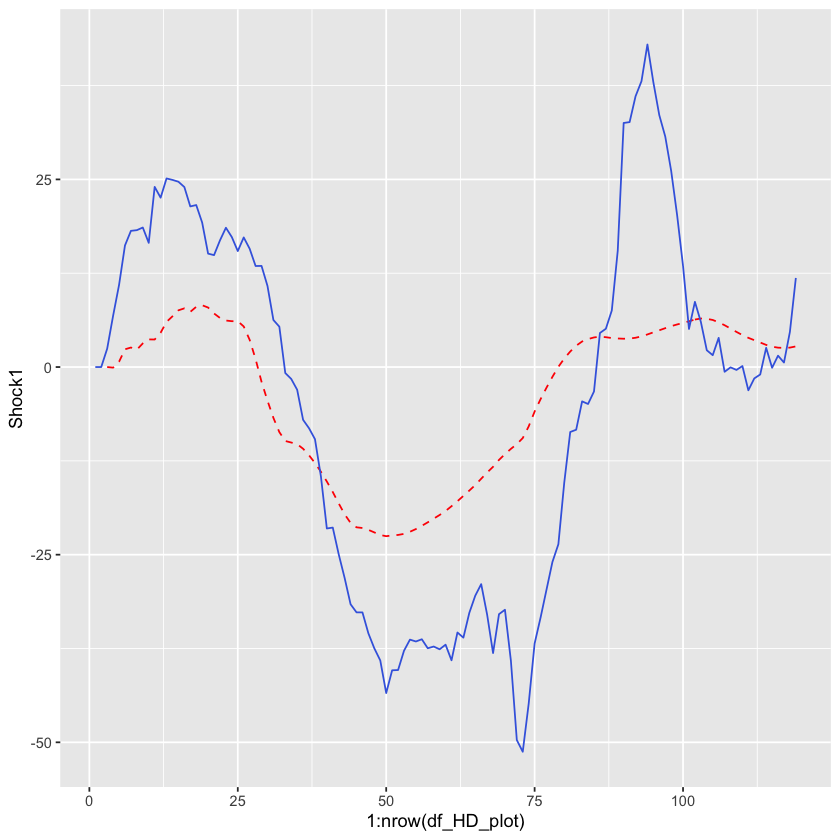

In [37]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')


### 對「房價」的歷史分解：housing price expectation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



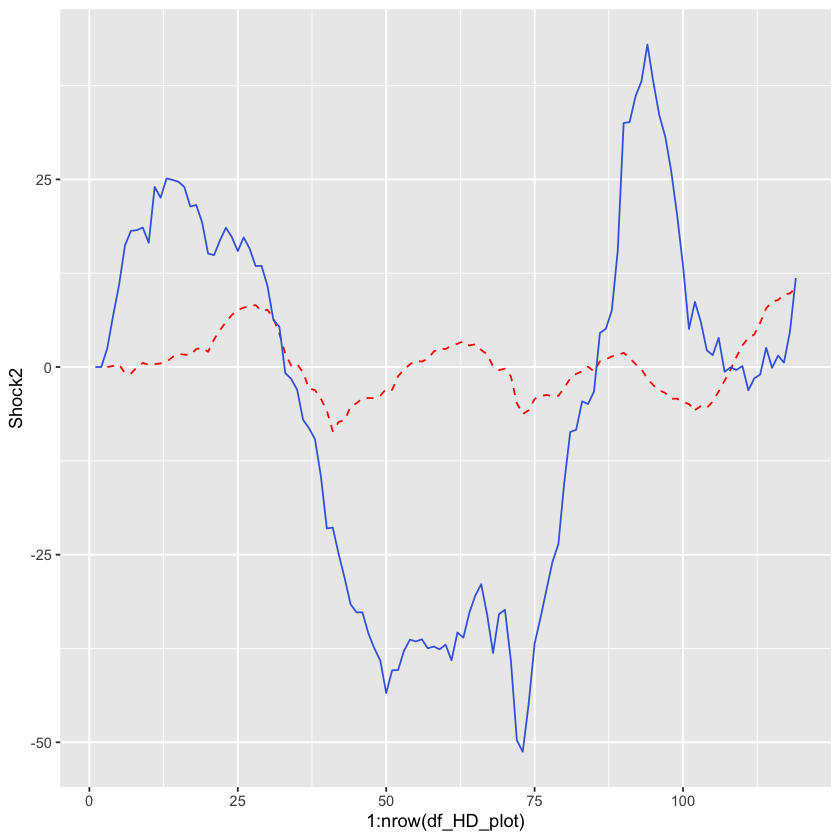

In [38]:
# ## shock2: housing price expectation shock
# SVAR_AB_HistDecomp[,c(2,7,12,17,22)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock2 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



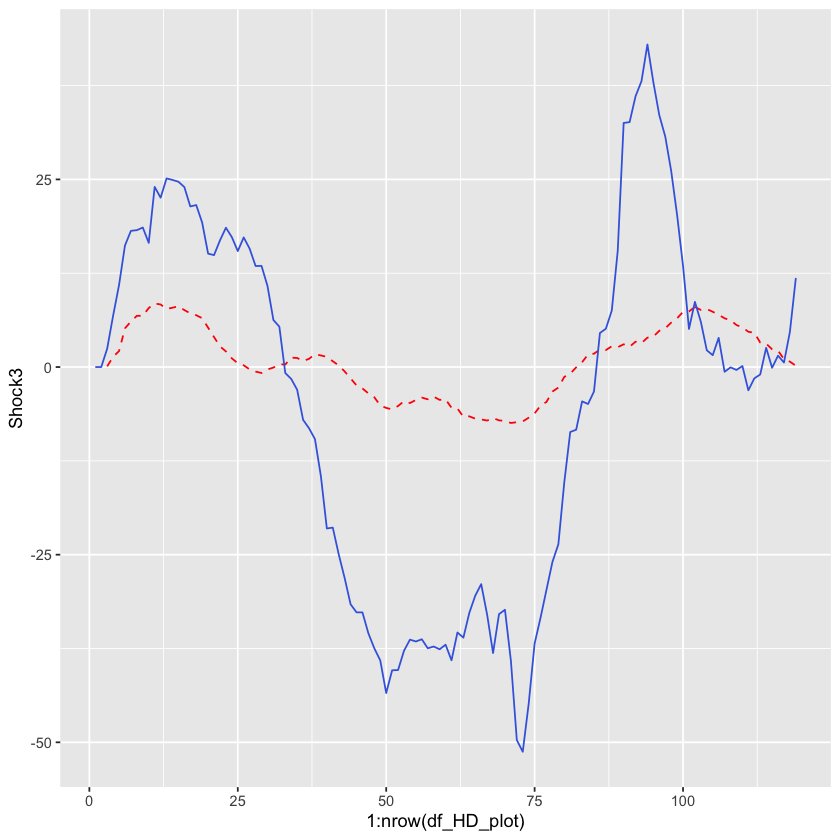

In [39]:
# ## shock3: supply shock
# SVAR_AB_HistDecomp[,c(3,8,13,18,23)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock3 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



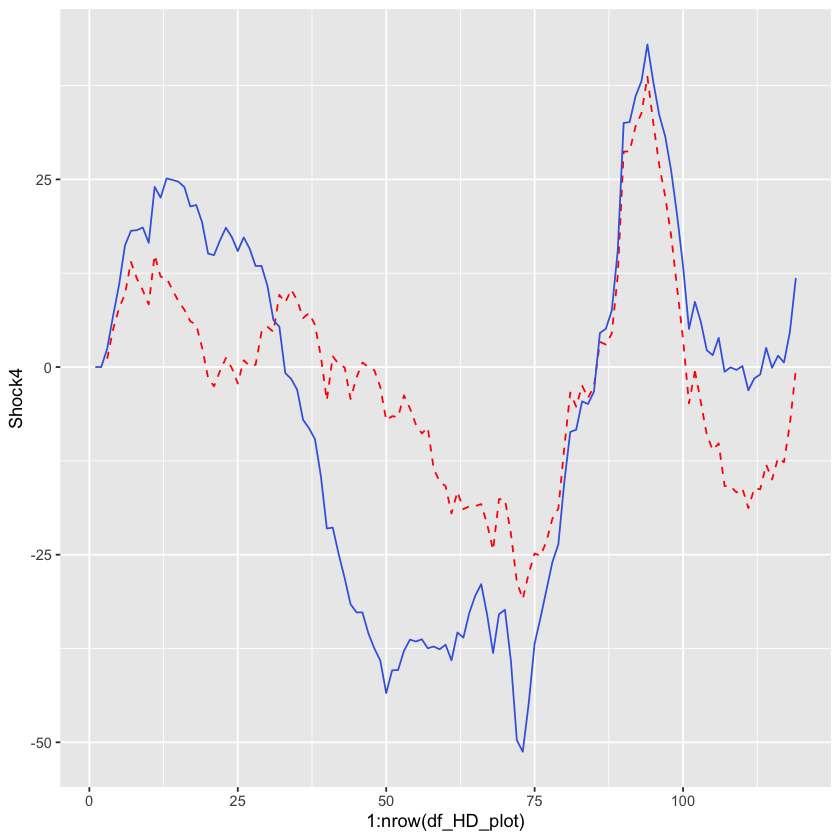

In [40]:
# ## shock4: demand shock
# SVAR_AB_HistDecomp[,c(4,9,14,19,24)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock4 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



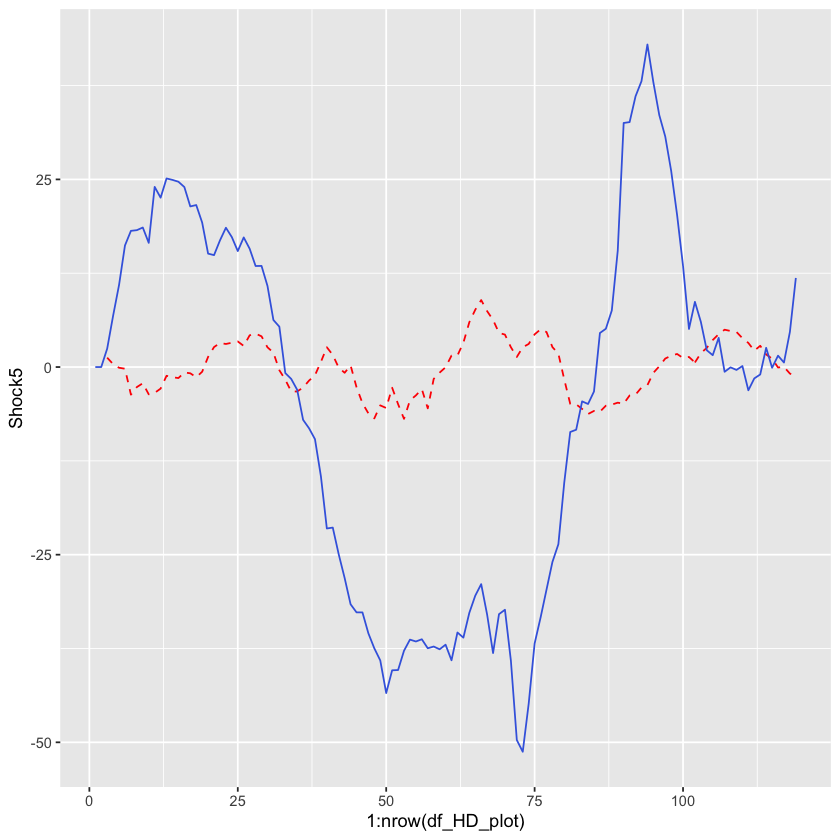

In [41]:
## shock5: housing speculation shock
#SVAR_AB_HistDecomp[,c(5,10,15,20,25)]-SVAR_AB_Hist.c0
## baseline上 hp 的變化
#(By-SVAR_AB_Hist.c0)[,5]
## shock5 對 hp 的衝擊
#(SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock5")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock5), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [42]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1991
for(q in 1:119){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [43]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,5],
                   SVAR_AB_HistDecomp[,21],
                   SVAR_AB_HistDecomp[,22],
                   SVAR_AB_HistDecomp[,23],
                   SVAR_AB_HistDecomp[,24],
                   SVAR_AB_HistDecomp[,25])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "expectation", "hs", "hd", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,expectation,hs,hd,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,2.56226767,2.951367,7.821429,3.1160202,-13.0035134,1.67696504
2019Q3,2019,3,-0.09624669,2.713851,8.686209,2.3670904,-14.9855189,1.12212248
2019Q4,2019,4,1.51354890,2.583140,8.931751,2.1758261,-12.1168980,-0.06027018
2020Q1,2020,1,0.60145802,2.550779,9.649477,1.0658901,-12.6860955,0.02140700
2020Q2,2020,2,4.68727347,2.590389,9.814966,0.7220862,-7.5700968,-0.87007125
2020Q3,2020,3,11.87077788,2.751787,10.555561,0.1705318,-0.3461985,-1.26090322


In [44]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          expectation = median(expectation),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          expectation = median(expectation),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          expectation = median(expectation),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

In [45]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock",
                        "Housing Price Expectation Shock",
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Price Expectation Shock,Housing Supply Shock,Housing Demand Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),35.29223,6.6639904,13.10340,44.964794,-0.706727
房價持平期(1991Q1-2002Q4),34.82485,13.0684260,8.11188,9.874046,6.932670
房價上升期(2003Q1-2020Q3),35.89005,0.6965778,14.14732,57.578533,-3.982044


In [46]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Sun Jan 24 11:37:24 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Price Expectation Shock & Housing Supply Shock & Housing Demand Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1991Q1-2020Q3) & 35.29 & 6.66 & 13.10 & 44.96 & -0.71 \\ 
  房價持平期(1991Q1-2002Q4) & 34.82 & 13.07 & 8.11 & 9.87 & 6.93 \\ 
  房價上升期(2003Q1-2020Q3) & 35.89 & 0.70 & 14.15 & 57.58 & -3.98 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [47]:
print(tab_HD, include.rownames=FALSE,
      file="table/SVAR_SVAR_v5i2-norm175366_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [48]:
xlab <- lubridate::yq(df_HD$Time)

In [49]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2: price expectation shock
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = expectation, color = "Housing Price Expectation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Price Expectation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3: supply shock
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 4: demand shock
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())


# plot 5: sp
figure_HD.5 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [55]:
# save shock 1
ggsave(filename = "figure/SVAR_v5i2-norm175366_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "figure/SVAR_v5i2-norm175366_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "figure/SVAR_v5i2-norm175366_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "figure/SVAR_v5i2-norm175366_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 5
ggsave(filename = "figure/SVAR_v5i2-norm175366_HD_shock5.png", 
       plot = figure_HD.5,
       width = 15, height = 10, units = "cm",
       device = "png")